In [82]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
font_size = 30

In [3]:
geojson_dir = '/scratch/projects/forestcare/repos/synforest/pytreedb/geojsons'
tree_files = os.listdir(geojson_dir)
species = [f.split('_')[0] for f in tree_files] 

In [4]:
scientific_names = {'AbiAlb': 'Abies alba',
                    'AceCam': 'Acer campestre', 
                    'AcePse': 'Acer pseudoplatanus',
                    'BetPen': 'Betula pendula',
                    'CarBet': 'Carpinus betulus',
                    'FagSyl': 'Fagus sylvatica',
                    'FraExc': 'Fraxinus excelsior',
                    'JugReg': 'Juglans regia',
                    'LarDec': 'Larix decidua',
                    'PicAbi': 'Picea abies',
                    'PinSyl': 'Pinus sylvestris',
                    'PruAvi': 'Prunus avium',
                    'PruSer': 'Prunus serotina',
                    'PseMen': 'Pseudotsuga menziesii',
                    'QuePet': 'Quercus petraea',
                    'QueRob': 'Quercus robur',
                    'QueRub': 'Quercus rubra',
                    'RobPse': 'Robinia pseudoacacia',
                    'SalCap': 'Salix caprea',
                    'SorTor': 'Sorbus torminalis',
                    'TilSpe': 'Tilia sp.',
                    'TsuHet': 'Tsuga heterophylla'}

In [5]:
np.unique(species)

array(['AbiAlb', 'AceCam', 'AcePse', 'BetPen', 'CarBet', 'FagSyl',
       'FraExc', 'JugReg', 'LarDec', 'PicAbi', 'PinSyl', 'PruAvi',
       'PruSer', 'PseMen', 'QuePet', 'QueRob', 'QueRub', 'RobPse',
       'SalCap', 'SorTor', 'TilSpe', 'TsuHet'], dtype='<U6')

In [6]:
ourspecies = ["PinSyl", "PicAbi", "FagSyl", "QueRub", "AceCam", "FraExc", "BetPen", "PseMen"]
# \textit{Pinus sylvestris}, \textit{Picea abies}, \textit{Fagus sylvatica}, \textit{Quercus rubra}, \textit{Acer campestre}, \textit{Fraxinus excelsior}, \textit{Betula pendula}, \textit{"Pseudotsuga menziesii}

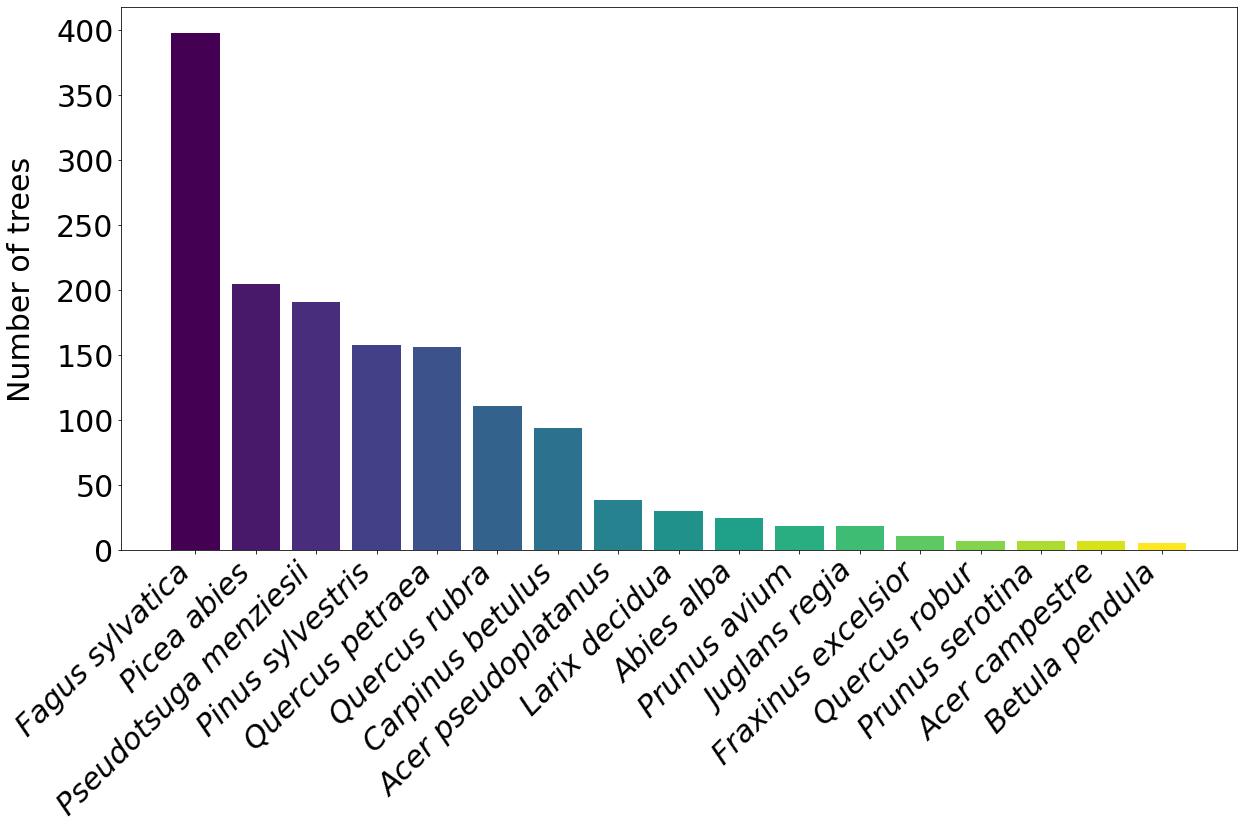

In [7]:
plt.figure(figsize=(20,10))

unique_species, species_cnt = np.unique(species, return_counts=True)
#sort the species by count
species_cnt, unique_species = zip(*sorted(zip(species_cnt, unique_species)))

# reverse
species_cnt = species_cnt[::-1]
unique_species = unique_species[::-1]
unique_species_sc = [scientific_names[s] for s in unique_species]

# take first 15 species
species_cnt = species_cnt[:17]
unique_species = unique_species[:17]
unique_species_sc = unique_species_sc[:17]

# different colors for different species in viridis colormap
plt.bar(unique_species_sc, species_cnt, color=plt.cm.viridis(np.linspace(0,1,len(unique_species))))
# italicize species names
# and rotate them 75 degrees and anchor them to the right so they don't overlap
plt.xticks(unique_species_sc, unique_species_sc, rotation=45, fontstyle='italic', ha='right', fontsize=30)
# font size for y axis
plt.yticks(fontsize=30)
plt.ylabel('Number of trees', fontsize=30, labelpad=20)
plt.show()

#ourspecies = ["PinSyl", "PicAbi", "FagSyl", "QueRub", "AceCam", "FraExc", "BetPen", "PseMen"]

In [8]:
heights = []
for f in tree_files:
    with open(os.path.join(geojson_dir, f)) as json_file:
        cur_heights = []
        data = json.load(json_file)
        for measurement in data['properties']['measurements']:
            if 'height_m' in measurement and measurement['height_m'] is not None:
                cur_heights.append(measurement['height_m'])
        if len(cur_heights) > 0:
            heights.append((f, np.mean(cur_heights)))

In [9]:
print(len(heights))

1491


['AbiAlb' 'AceCam' 'AcePse' 'BetPen' 'CarBet' 'FagSyl' 'FraExc' 'JugReg'
 'LarDec' 'PicAbi' 'PinSyl' 'PruAvi' 'PruSer' 'PseMen' 'QuePet' 'QueRob'
 'QueRub' 'RobPse' 'SalCap' 'SorTor' 'TilSpe' 'TsuHet']


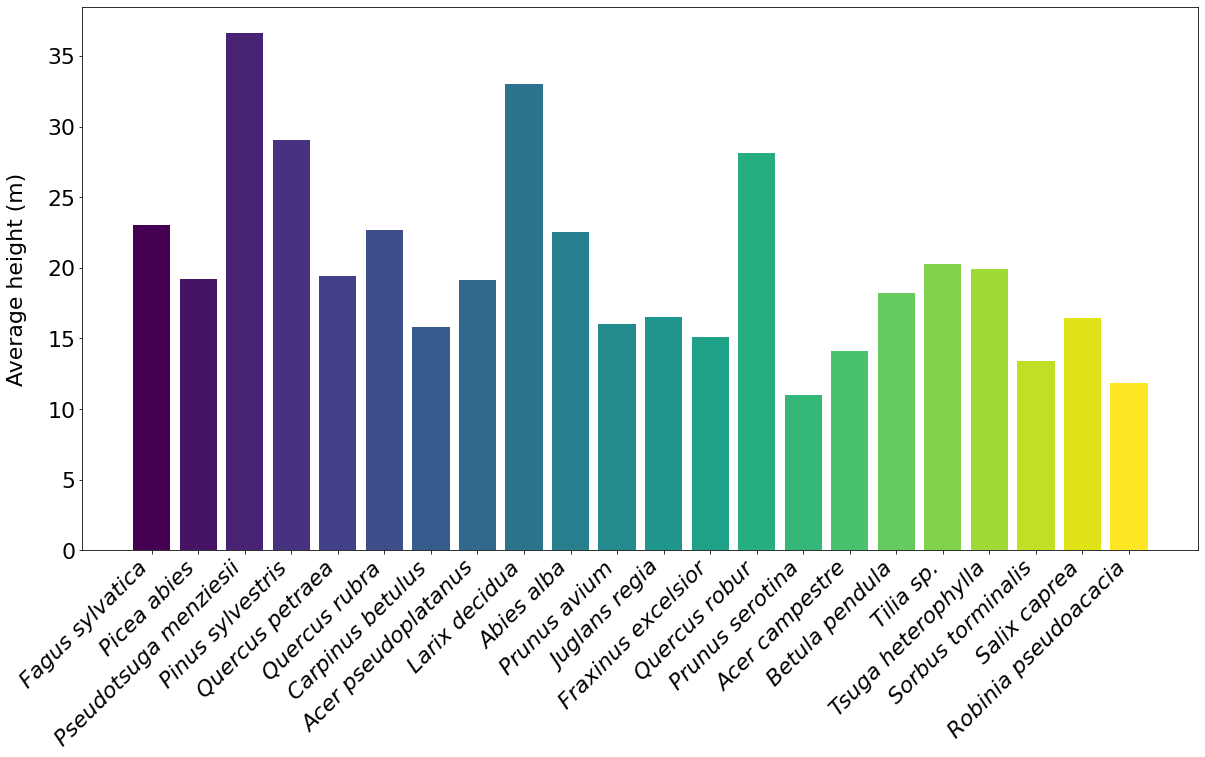

In [10]:
# plot average height of trees
plt.figure(figsize=(20,10))
species = [h[0].split('_')[0] for h in heights]
unique_species, species_cnt = np.unique(species, return_counts=True)
print(unique_species)
#sort the species by count
species_cnt, unique_species = zip(*sorted(zip(species_cnt, unique_species)))
# reverse
species_cnt = species_cnt[::-1]
unique_species = unique_species[::-1]
avg_heights = []
for s in unique_species:
    avg_heights.append(np.mean([h[1] for h in heights if h[0].split('_')[0] == s]))
unique_species_sc = [scientific_names[s] for s in unique_species]
# different colors for different species in viridis colormap
plt.bar(unique_species_sc, avg_heights, color=plt.cm.viridis(np.linspace(0,1,len(unique_species))))
# italicize species names
# and rotate them 75 degrees and anchor them to the right so they don't overlap
plt.xticks(unique_species_sc, unique_species_sc, rotation=45, fontstyle='italic', ha='right', fontsize=22)
plt.ylabel('Average height (m)', fontsize=22, labelpad=20)
# font size for y axis
plt.yticks(fontsize=22)
plt.show()

In [19]:
# obtain average DBH
dbh = []
for f in tree_files:
    with open(os.path.join(geojson_dir, f)) as json_file:
        cur_dbh = []
        data = json.load(json_file)
        for measurement in data['properties']['measurements']:
            if 'DBH_cm' in measurement and measurement['DBH_cm'] is not None:
                cur_dbh.append(measurement['DBH_cm'])
        if len(cur_dbh) > 0:
            dbh.append((f, np.mean(cur_dbh)))

In [63]:
print(len(dbh))

1247


['AbiAlb' 'AceCam' 'AcePse' 'BetPen' 'CarBet' 'FagSyl' 'FraExc' 'JugReg'
 'LarDec' 'PicAbi' 'PinSyl' 'PruAvi' 'PruSer' 'PseMen' 'QuePet' 'QueRob'
 'QueRub' 'RobPse' 'SalCap' 'SorTor' 'TilSpe' 'TsuHet']


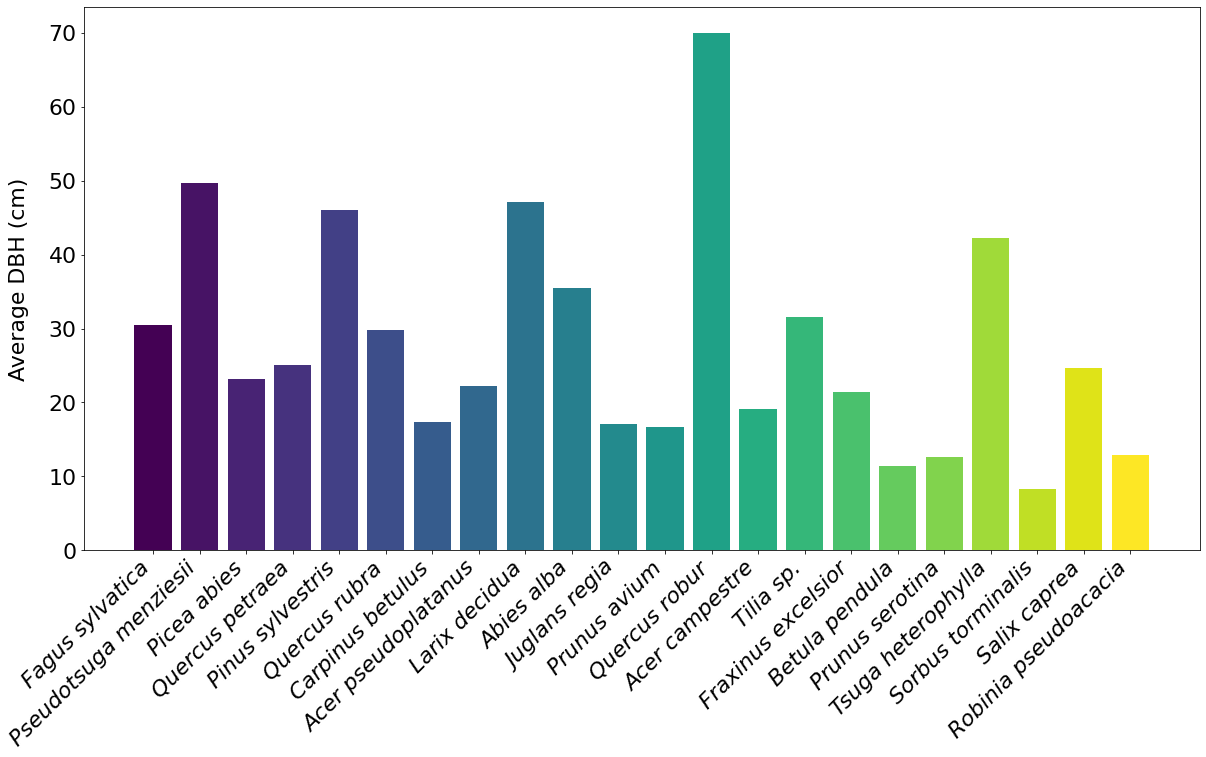

In [70]:
# plot average DBH of trees
plt.figure(figsize=(20,10))
species = [h[0].split('_')[0] for h in dbh]
unique_species, species_cnt = np.unique(species, return_counts=True)
print(unique_species)
#sort the species by count
species_cnt, unique_species = zip(*sorted(zip(species_cnt, unique_species)))
# reverse
species_cnt = species_cnt[::-1]
unique_species = unique_species[::-1]
avg_dbh = []
for s in unique_species:
    avg_dbh.append(np.mean([h[1] for h in dbh if h[0].split('_')[0] == s]))
unique_species_sc = [scientific_names[s] for s in unique_species]
# different colors for different species in viridis colormap
plt.bar(unique_species_sc, avg_dbh, color=plt.cm.viridis(np.linspace(0,1,len(unique_species))))
# italicize species names
# and rotate them 75 degrees and anchor them to the right so they don't overlap
plt.xticks(unique_species_sc, unique_species_sc, rotation=45, fontstyle='italic', ha='right', fontsize=22)
# font size for y axis
plt.yticks(fontsize=22)
# plot y axis and add some space to the left
plt.ylabel('Average DBH (cm)', fontsize=22, labelpad=20)
plt.show()


In [55]:
# obtain for each tree if it has ULS, TLS, ALS 
ULS_trees = []
TLS_trees = []
ALS_trees = []
for f in tree_files:
    with open(os.path.join(geojson_dir, f)) as json_file:
        cur_dbh = []
        data = json.load(json_file)
        for d in data['properties']['data']:
            if 'mode' in d and d['mode'] == 'ULS':
                ULS_trees.append(f)
            if 'mode' in d and d['mode'] == 'TLS':
                TLS_trees.append(f)
            if 'mode' in d and d['mode'] == 'ALS':
                ALS_trees.append(f)

In [56]:
ULS_species_cnt = []
TLS_species_cnt = []
ALS_species_cnt = []
for s in unique_species:
    ULS_species_cnt.append(len([t for t in ULS_trees if t.split('_')[0] == s]))
    TLS_species_cnt.append(len([t for t in TLS_trees if t.split('_')[0] == s]))
    ALS_species_cnt.append(len([t for t in ALS_trees if t.split('_')[0] == s]))

In [57]:
unique_species, species_cnt = np.unique(species, return_counts=True)

In [58]:
species = [h.split('_')[0] for h in ULS_trees]
unique_species, species_cnt = np.unique(species, return_counts=True)
#sort the species by count
species_cnt, unique_species = zip(*sorted(zip(species_cnt, unique_species)))
# reverse
species_cnt = species_cnt[::-1]
unique_species = unique_species[::-1]
unique_species_sc = [scientific_names[s] for s in unique_species]

# select only species from our study
ULS_species_cnt = [ULS_species_cnt[i] for i in range(len(unique_species)) if unique_species[i] in ourspecies]
TLS_species_cnt = [TLS_species_cnt[i] for i in range(len(unique_species)) if unique_species[i] in ourspecies]
ALS_species_cnt = [ALS_species_cnt[i] for i in range(len(unique_species)) if unique_species[i] in ourspecies]
unique_species = [unique_species[i] for i in range(len(unique_species)) if unique_species[i] in ourspecies]
unique_species_sc = [scientific_names[s] for s in unique_species]

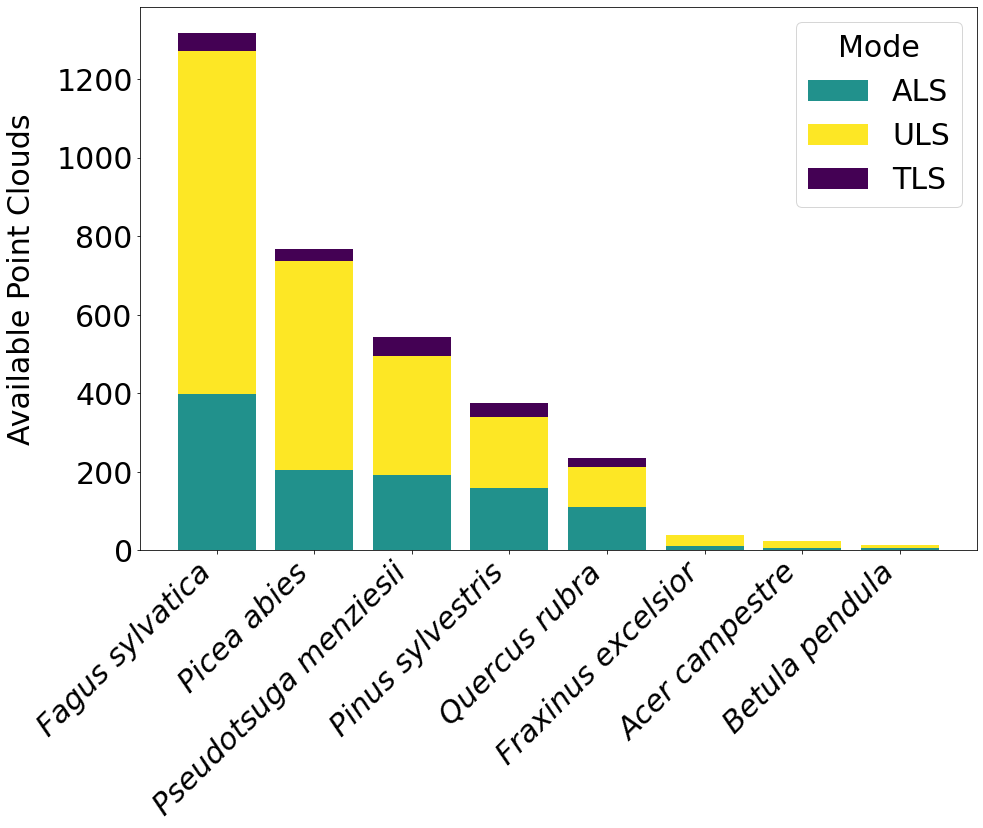

In [67]:
# plot number of trees with ULS, TLS, ALS as stacked bar plot
plt.figure(figsize=(15,10))

# different colors for ALS, ULS, TLS, with different colormap than viridis
colors = plt.cm.viridis(np.linspace(0,1,3))
# reverse colors
colors = [colors[1], colors[2], colors[0]]
plt.bar(unique_species_sc, ALS_species_cnt, color=colors[0], label='ALS')
plt.bar(unique_species_sc, ULS_species_cnt, bottom=ALS_species_cnt, color=colors[1], label='ULS')
plt.bar(unique_species_sc, TLS_species_cnt, bottom=np.array(ULS_species_cnt)+np.array(ALS_species_cnt), color=colors[2], label='TLS')
plt.legend(fontsize=font_size, title='Mode', title_fontsize=font_size)
# italicize species names
# and rotate them 75 degrees and anchor them to the right so they don't overlap
plt.xticks(unique_species_sc, unique_species_sc, rotation=45, fontstyle='italic', ha='right', fontsize=font_size)
# font size for y axis
plt.yticks(fontsize=font_size)
# plot y axis and add some space to the left
plt.ylabel('Available Point Clouds', fontsize=font_size, labelpad=20)
plt.show()


In [46]:
# obtain for each tree if it has ULS, TLS, ALS 
ULS_max_qualities = []
for f in tree_files:
    with open(os.path.join(geojson_dir, f)) as json_file:
        species = f.split('_')[0]
        cur_max_quality = None
        data = json.load(json_file)
        for d in data['properties']['data']:
            if 'mode' in d and d['mode'] == 'ULS':
                cur_max_quality = max([d['quality'], cur_max_quality]) if cur_max_quality is not None else d['quality']
        if cur_max_quality is not None:
            ULS_max_qualities.append((species, cur_max_quality))

In [34]:
np.unique([q[1] for q in ULS_max_qualities])

array([1, 2, 3, 4, 5])

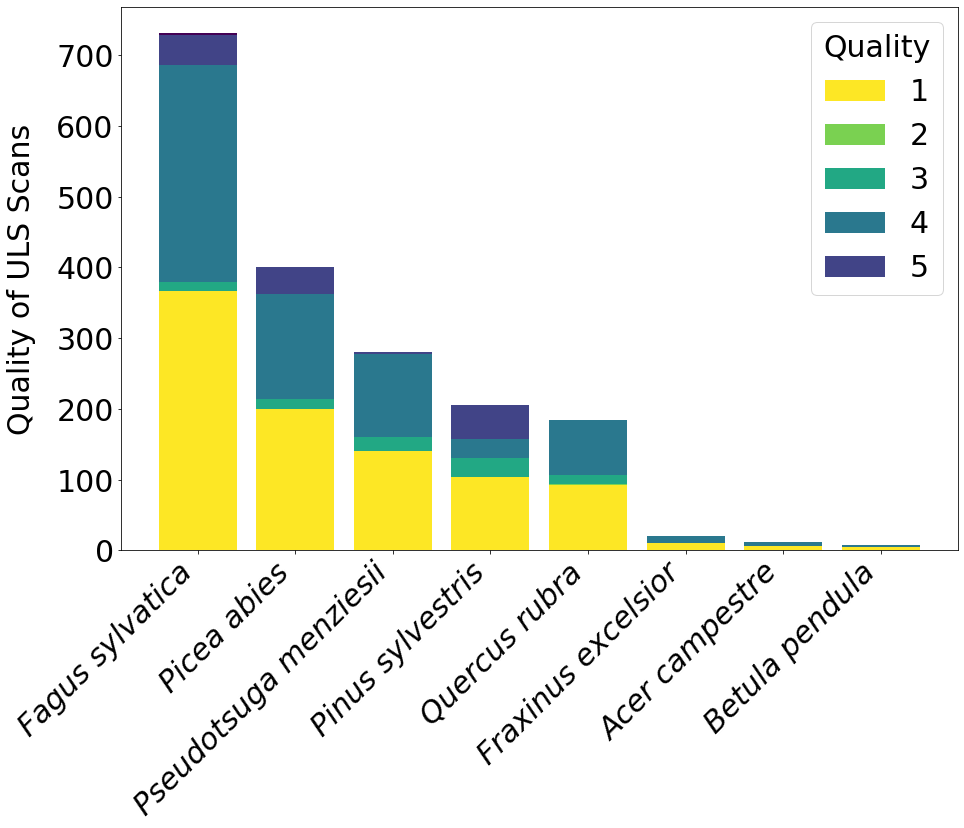

In [47]:
# plot number of trees with various ULS qualities
plt.figure(figsize=(15,10))

# different colors for various qualities
colors = plt.cm.viridis(np.linspace(0,1,6))
# reverse colors
colors = colors[::-1]
unique_species, species_cnt = np.unique([q[0] for q in ULS_max_qualities], return_counts=True)
#sort the species by count
species_cnt, unique_species = zip(*sorted(zip(species_cnt, unique_species)))
# reverse
species_cnt = species_cnt[::-1]
unique_species = unique_species[::-1]
unique_species_sc = [scientific_names[s] for s in unique_species]

# select only species from our study
ULS_max_qualities = [q for q in ULS_max_qualities if q[0] in ourspecies]
unique_species, species_cnt = np.unique([q[0] for q in ULS_max_qualities], return_counts=True)
#sort the species by count
species_cnt, unique_species = zip(*sorted(zip(species_cnt, unique_species)))
# reverse
species_cnt = species_cnt[::-1]
unique_species = unique_species[::-1]
unique_species_sc = [scientific_names[s] for s in unique_species]

# stack bar plot
plt.bar(unique_species_sc, species_cnt, color=colors[0], label='0')
prev_species_cnt = species_cnt
quality_names = ['1', '2', '3', '4', '5']
for i in range(1,6):
    species_cnt = []
    for s in unique_species:
        species_cnt.append(len([q for q in ULS_max_qualities if q[0] == s and q[1] == i]))
    plt.bar(unique_species_sc, species_cnt, bottom=np.array(prev_species_cnt), color=colors[i], label=quality_names[i-1])
    prev_species_cnt = np.array(prev_species_cnt) + np.array(species_cnt)
# display only quality names in legend
plt.legend(fontsize=font_size, title='Quality', title_fontsize=font_size, labels=quality_names)

# italicize species names

# and rotate them 75 degrees and anchor them to the right so they don't overlap
plt.xticks(unique_species_sc, unique_species_sc, rotation=45, fontstyle='italic', ha='right', fontsize=font_size)
# font size for y axis
plt.yticks(fontsize=font_size)
# plot y axis and add some space to the left
plt.ylabel('Quality of ULS Scans', fontsize=font_size, labelpad=20)
plt.show()


In [68]:
heights = []
for f in tree_files:
    with open(os.path.join(geojson_dir, f)) as json_file:
        species = f.split('_')[0]
        cur_heights = []
        data = json.load(json_file)
        for measurement in data['properties']['measurements']:
            if 'height_m' in measurement and measurement['height_m'] is not None:
                cur_heights.append(measurement['height_m'])
        if len(cur_heights) > 0:
            heights.append((species, np.mean(cur_heights)))

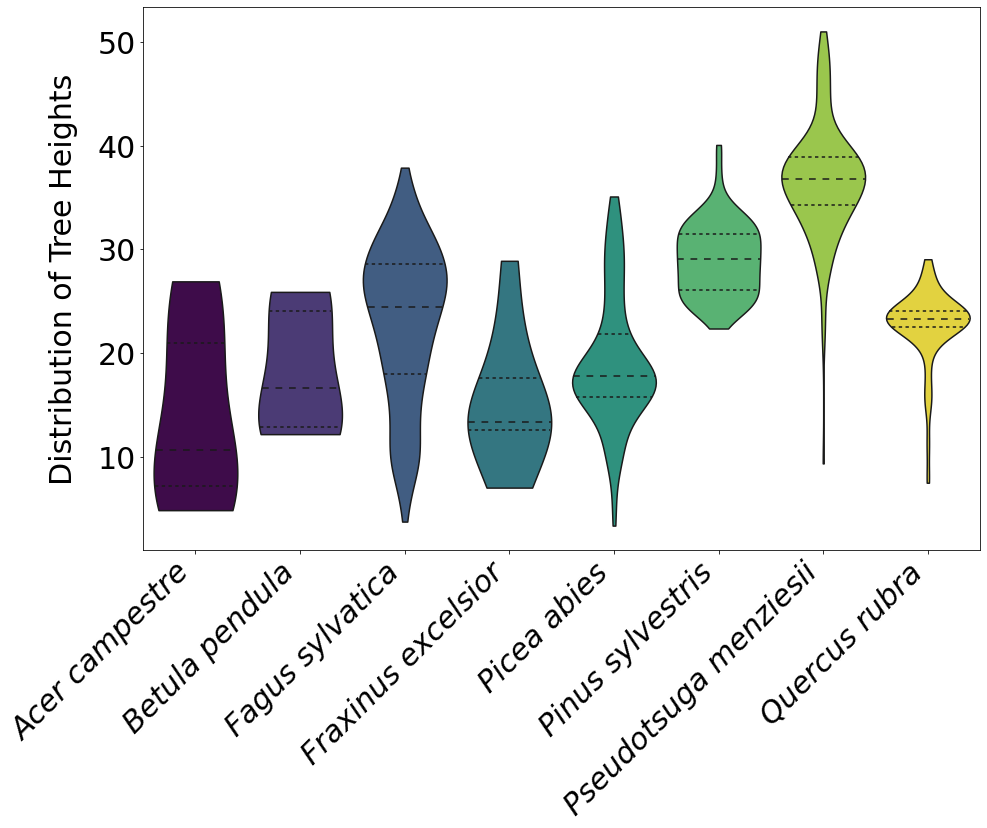

In [120]:
# plot tree heights
plt.figure(figsize=(15,10))

# different colors for various qualities
colors = plt.cm.viridis(np.linspace(0,1,6))
# reverse colors
colors = colors[::-1]
unique_species, species_cnt = np.unique([q[0] for q in heights], return_counts=True)
#sort the species by count
species_cnt, unique_species = zip(*sorted(zip(species_cnt, unique_species)))
# reverse
species_cnt = species_cnt[::-1]
unique_species = unique_species[::-1]
unique_species_sc = [scientific_names[s] for s in unique_species]

# select only species from our study
heights = [q for q in heights if q[0] in ourspecies]
unique_species, species_cnt = np.unique([q[0] for q in heights], return_counts=True)
#sort the species by count
#species_cnt, unique_species = zip(*sorted(zip(species_cnt, unique_species)))
# reverse
#species_cnt = species_cnt[::-1]
#unique_species = unique_species[::-1]
unique_species_sc = [scientific_names[s] for s in unique_species]
colors = plt.cm.viridis(np.linspace(0,1,len(unique_species)))
# violin plot
#plt.violinplot([np.array([h[1] for h in heights if h[0] == s]) for s in unique_species], showmeans=True)
sns.violinplot([np.array([h[1] for h in heights if h[0] == s]) for s in unique_species], palette=colors, inner='quartile', scale='width', cut = 0)
plt.xticks(range(0, len(unique_species)), unique_species_sc, rotation=45, fontstyle='italic', ha='right', fontsize=font_size)

# font size for y axis
plt.yticks(range(0,60, 10), fontsize=font_size)
# plot y axis and add some space to the left
plt.ylabel('Distribution of Tree Heights', fontsize=font_size, labelpad=20)

plt.show()


In [104]:
# obtain average DBH
dbh = []
for f in tree_files:
    with open(os.path.join(geojson_dir, f)) as json_file:
        cur_dbh = []
        species = f.split('_')[0]
        data = json.load(json_file)
        for measurement in data['properties']['measurements']:
            if 'DBH_cm' in measurement and measurement['DBH_cm'] is not None and measurement['DBH_cm'] > 0:
                cur_dbh.append(measurement['DBH_cm'])
        cur_dbh = np.array(cur_dbh)
        if len(cur_dbh) > 0:
            dbh.append((species, np.mean(cur_dbh)))

In [111]:
np.array([d[1] for d in dbh if d[0] == 'AceCam'])

array([17. , 41.5,  6.4, 24. ,  6.4])

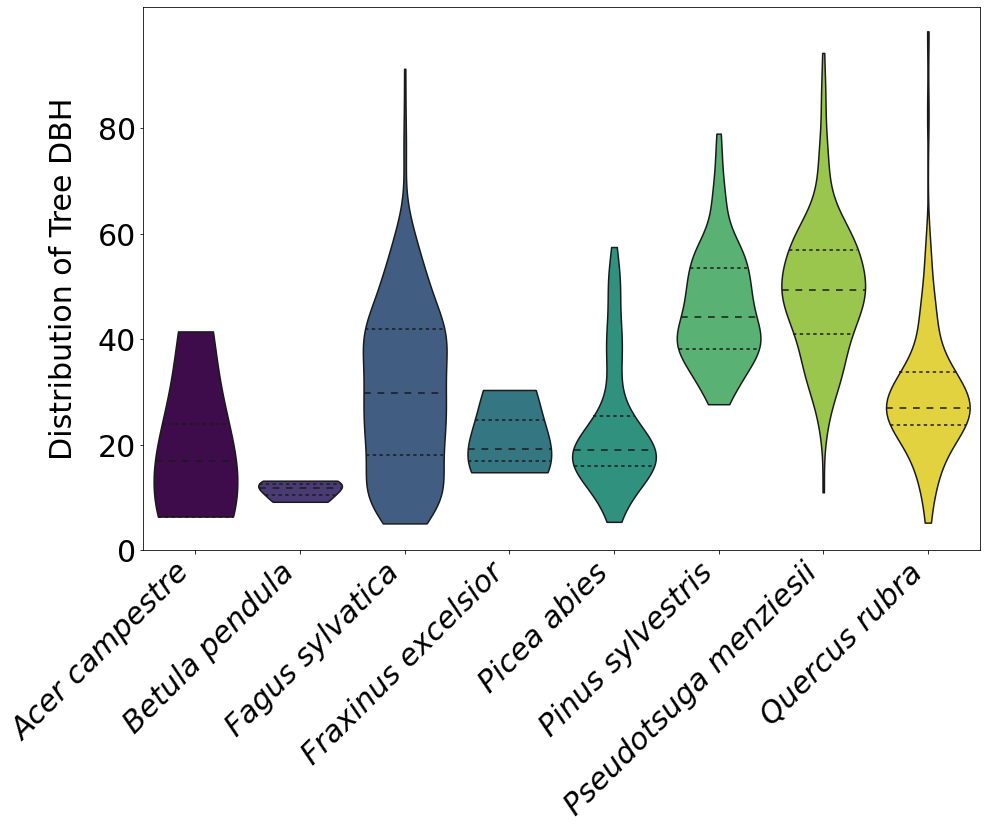

In [119]:
# plot tree dbh
plt.figure(figsize=(15,10))

# different colors for various qualities
colors = plt.cm.viridis(np.linspace(0,1,6))
# reverse colors
colors = colors[::-1]
unique_species, species_cnt = np.unique([q[0] for q in dbh], return_counts=True)
#sort the species by count
species_cnt, unique_species = zip(*sorted(zip(species_cnt, unique_species)))
# reverse
species_cnt = species_cnt[::-1]
unique_species = unique_species[::-1]
unique_species_sc = [scientific_names[s] for s in unique_species]

# select only species from our study
dbh = [q for q in dbh if q[0] in ourspecies]
unique_species, species_cnt = np.unique([q[0] for q in dbh], return_counts=True)
#sort the species by count
#species_cnt, unique_species = zip(*sorted(zip(species_cnt, unique_species)))
# reverse
#species_cnt = species_cnt[::-1]
#unique_species = unique_species[::-1]
unique_species_sc = [scientific_names[s] for s in unique_species]
colors = plt.cm.viridis(np.linspace(0,1,len(unique_species)))
# violin plot
#plt.violinplot([np.array([h[1] for h in heights if h[0] == s]) for s in unique_species], showmeans=True)
sns.violinplot([np.array([d[1] for d in dbh if d[0] == s]) for s in unique_species], palette=colors, inner='quartile', scale='width', cut=0)
plt.xticks(range(0, len(unique_species)), unique_species_sc, rotation=45, fontstyle='italic', ha='right', fontsize=font_size)

# font size for y axis
plt.yticks(range(0, 100, 20), fontsize=font_size)
# plot y axis and add some space to the left
plt.ylabel('Distribution of Tree DBH', fontsize=font_size, labelpad=20)

plt.show()
